# In this model we are going to predict the presence of Heart Disease in the given dataset

# Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [31]:
import warnings
warnings.simplefilter("ignore")

# Loading the Dataset

In [66]:
a = pd.read_csv("Heart_Disease.csv")             # updated column title according to the problem statement
a.head()                                         # target is the column denotes presence of heart disease or not

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


# Exploratory Data Analysis

In [67]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  target    200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [68]:
a.describe()

,age,sex,cp,restecg,target
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


Outliers may be present, 
Data Dispersion is very low since std is less than mean value

In [9]:
a.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
a.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
target       int64
dtype: object

In [11]:
a['trestbps'].unique()

array(['140', '130', '132', '142', '110', '120', '150', '180', '160',
       '126', '?', '128', '170', '152', '116', '124', '0', '122', '144',
       '154', '125', '104', '136', '134', '138', '178', '146', '135',
       '158', '106', '112', '102', '96', '172', '155', '156', '118',
       '100', '190', '114', '127'], dtype=object)

In [12]:
a['chol'].unique()

array(['260', '209', '218', '228', '213', '0', '236', '267', '166', '220',
       '177', '186', '100', '171', '230', '281', '203', '277', '233',
       '240', '153', '224', '316', '311', '270', '217', '214', '252',
       '339', '216', '276', '458', '241', '384', '297', '248', '308',
       '208', '227', '210', '245', '225', '198', '195', '161', '258',
       '235', '305', '223', '282', '349', '?', '160', '312', '283', '142',
       '211', '306', '222', '202', '197', '204', '274', '192', '298',
       '272', '200', '261', '181', '221', '175', '219', '310', '232',
       '273', '182', '292', '289', '193', '170', '369', '173', '271',
       '244', '285', '243', '237', '165', '287', '256', '264', '226',
       '207', '284', '337', '254', '300', '333', '139', '385'],
      dtype=object)

we can see some missing values with "?" symbol in few columns

In [76]:
a.target.value_counts()

1    56
0    51
3    42
2    41
4    10
Name: target, dtype: int64

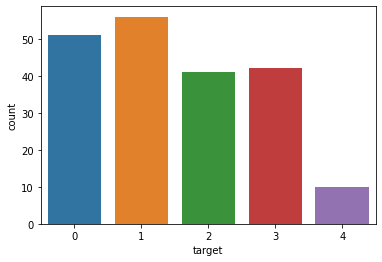

In [82]:
sns.countplot(x="target", data=a)
plt.show()

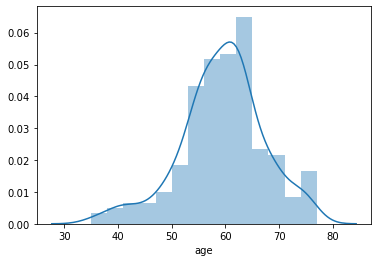

In [83]:
sns.distplot(a['age'])
plt.show()

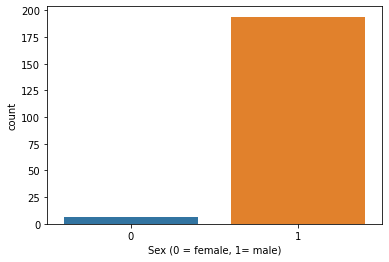

In [84]:
sns.countplot(x='sex', data=a)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [94]:
b = a[['trestbps', 'chol','fbs',
                       'thalach','exang','oldpeak',
                       'slope',
                       'ca', 'thal']].copy()
b.head()

,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal
0,140,260,0,112,1,3,2,?,1
1,130,209,0,127,0,0,?,?,1
2,132,218,0,140,1,1.5,3,?,1
3,142,228,0,149,1,2.5,1,?,1
4,110,213,1,99,1,1.3,2,?,1


In [97]:
b = pd.get_dummies(b)
b.head()

,trestbps_0,trestbps_100,trestbps_102,trestbps_104,trestbps_106,trestbps_110,trestbps_112,trestbps_114,trestbps_116,trestbps_118,...,slope_1,slope_2,slope_3,slope_?,ca_0,ca_?,thal_1,thal_3,thal_6,thal_7
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [98]:
from scipy.stats import zscore

In [100]:
c = a[['age','sex','cp','restecg',
           'target']].copy()
c.head()

,age,sex,cp,restecg,target
0,63,1,4,1,2
1,44,1,4,1,0
2,60,1,4,1,2
3,55,1,4,1,1
4,66,1,3,2,0


In [101]:
d = pd.concat([b, c], axis=1)
d.head()

,trestbps_0,trestbps_100,trestbps_102,trestbps_104,trestbps_106,trestbps_110,trestbps_112,trestbps_114,trestbps_116,trestbps_118,...,ca_?,thal_1,thal_3,thal_6,thal_7,age,sex,cp,restecg,target
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,63,1,4,1,2
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,44,1,4,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,60,1,4,1,2
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,55,1,4,1,1
4,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,66,1,3,2,0


In [102]:
d.dtypes

trestbps_0      uint8
trestbps_100    uint8
trestbps_102    uint8
trestbps_104    uint8
trestbps_106    uint8
                ...  
age             int64
sex             int64
cp              int64
restecg         int64
target          int64
Length: 237, dtype: object

In [104]:
z = np.abs(stats.zscore(d))
print(z)

[[0.07088812 0.07088812 0.07088812 ... 0.62365375 0.38870891 0.3946109 ]
 [0.07088812 0.07088812 0.07088812 ... 0.62365375 0.38870891 1.24960118]
 [0.07088812 0.07088812 0.07088812 ... 0.62365375 0.38870891 0.3946109 ]
 ...
 [0.07088812 0.07088812 0.07088812 ... 0.62365375 0.38870891 0.3946109 ]
 [0.07088812 0.07088812 0.07088812 ... 0.62365375 1.85553498 1.24960118]
 [0.07088812 0.07088812 0.07088812 ... 1.8961594  1.85553498 0.42749514]]


In [105]:
threshold = 3
res = np.where(z > 3)
print("Length:", len(res[0]), ":", len(res[1]))
print("Rows:",res[0])
print("Columns:",res[1])

Length: 554 : 554
Rows: [  0   0   0   0   1   1   1   2   2   2   3   3   3   3   3   4   4   4
   4   5   5   5   5   6   6   6   7   7   8   8   8   8   9   9   9   9
  10  10  10  11  11  11  12  12  12  12  14  14  14  15  15  15  16  16
  16  16  17  17  17  18  18  19  19  20  20  20  20  21  21  22  22  24
  24  24  24  25  25  25  25  27  27  27  27  28  28  28  28  28  29  31
  31  31  31  32  32  32  32  33  33  34  34  35  35  35  36  37  37  37
  38  39  39  39  39  40  40  41  41  42  43  43  44  45  45  46  46  46
  46  47  47  48  49  49  49  49  50  50  50  51  52  52  52  52  52  53
  53  53  54  54  55  55  55  56  56  56  57  59  59  60  61  61  61  62
  62  62  62  63  63  63  64  64  65  65  65  65  66  66  66  66  66  66
  67  67  69  70  70  70  71  71  71  71  72  72  73  73  73  73  74  74
  74  74  75  75  75  76  76  76  76  77  78  78  78  78  79  79  79  79
  79  80  80  80  80  81  81  81  81  82  82  82  83  83  83  83  84  84
  84  84  85  85  85  86  8

In [106]:
d.shape

(200, 237)

In [109]:
x = d.drop(['target'], axis=1)
y = d['target']

In [111]:
from sklearn.model_selection import train_test_split

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [115]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [121]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
d[columns_to_scale] = standardScaler.fit_transform(d[columns_to_scale])

KeyError: "['thalach', 'chol', 'trestbps', 'oldpeak'] not in index"

In [119]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [120]:
print("Accuracy Score (training): ".format(lr.score(x_train, y_train)))
predicted_lr = lr.predict(x_test)
print("Accuracy Score (testing): ".format(metrics.accuracy_score(y_test, predicted_lr)))

Accuracy Score (training): 
Accuracy Score (testing): 
